### Name - Hettihewa.D.P.G
### Index - 190231R

# 1)

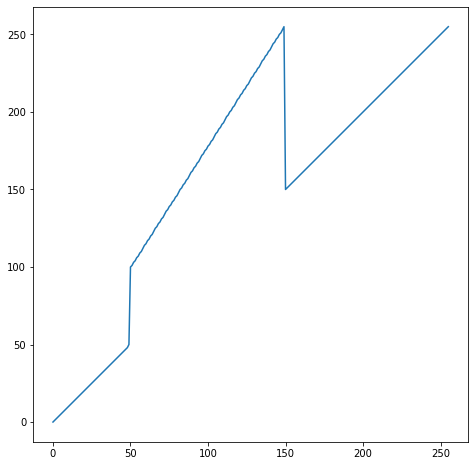

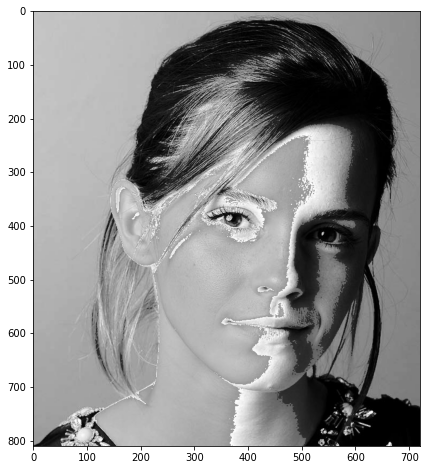

In [9]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

img = cv.imread(r'emma_gray.jpg')
assert img is not None

t1 = np.linspace(0, 50, 50)
t2 = np.linspace(100, 255, 100)
t3 = np.linspace(150, 255, 106)
 
t = np.concatenate((t1, t2, t3), axis = 0).astype(np.uint8)

fig, ax = plt.subplots(1, 1, figsize = (8,8))
ax.plot(t)
ax.set_aspect('equal')
transImg = cv.LUT(img, t)

fig, ax = plt.subplots(1, 1, figsize = (8,8))
implot = plt.imshow(cv.cvtColor(transImg, cv.COLOR_BGR2RGB))


# 2)

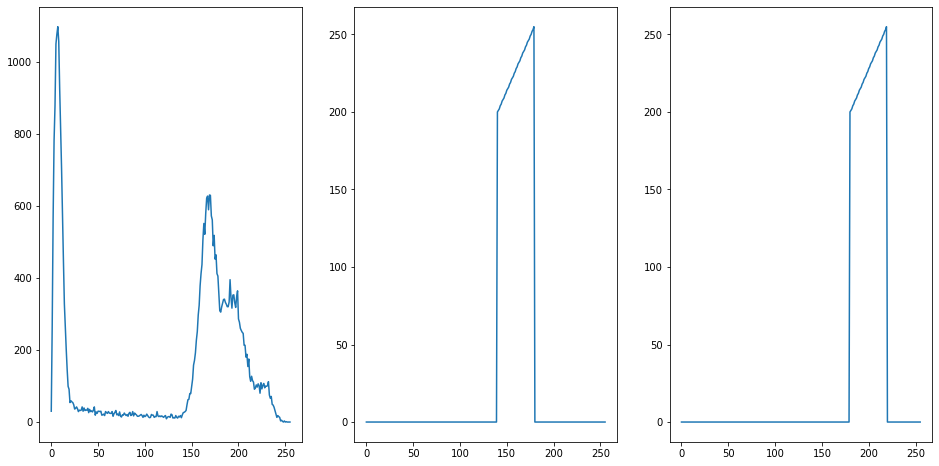

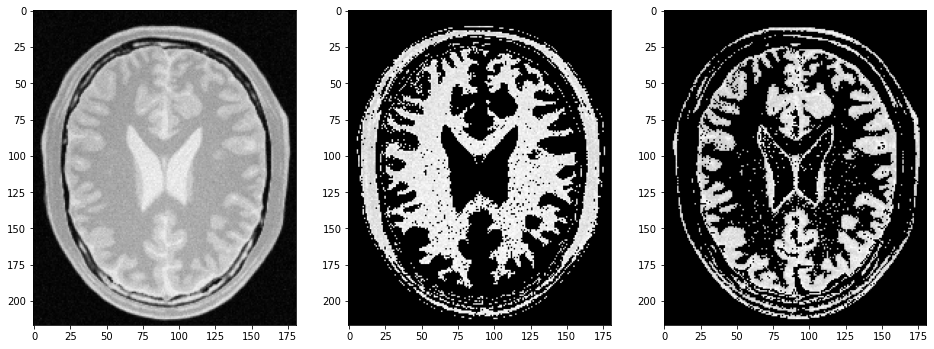

In [1]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
img = cv.imread(r'brain_proton_density_slice.png')
assert img is not None

hist_f = cv. calcHist([img], [0], None, [256], [0,256])
t1 = np.linspace(0, 0, 140)
t2 = np.linspace(200, 255, 40)
t3 = np.linspace(0, 0, 76)
T1 = np.linspace(0, 0, 180)
T2 = np.linspace(200, 255, 40)
T3 = np.linspace(0, 0, 36)
t = np.concatenate((t1, t2, t3), axis = 0).astype(np.uint8)
T = np.concatenate((T1, T2, T3), axis = 0).astype(np.uint8)
white = cv.LUT(img, t)
gray = cv.LUT(img, T)
fig, ax = plt.subplots(1,3,figsize = (16,8))
ax[0].plot(hist_f)
ax[1].plot(t)
ax[2].plot(T)
fig, ax = plt.subplots(1, 3, figsize = (16,8))
ax[0].imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
ax[1].imshow(cv.cvtColor(white, cv.COLOR_BGR2RGB))
ax[2].imshow(cv.cvtColor(gray, cv.COLOR_BGR2RGB))

# 3)

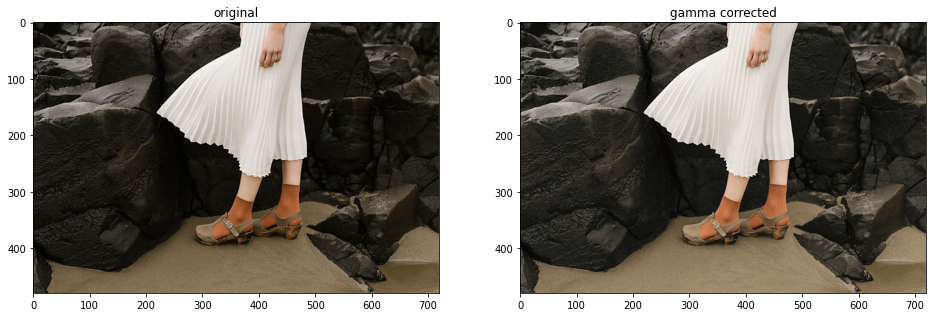

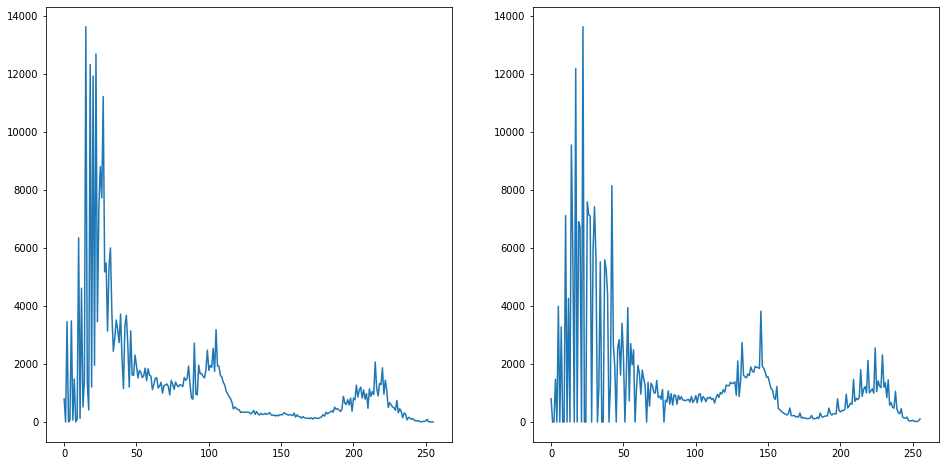

In [7]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

img1 = cv.imread(r'highlights_and_shadows.jpg')
assert img1 is not None
gamma = 0.8
limg = cv.cvtColor(img1,  cv.COLOR_BGR2LAB)
L, A, B = cv.split(limg)
t = np.array([(i/255)**gamma*255 for i in np.arange(0,256)]).astype(np.uint8)
g = cv.LUT(L, t)
img = cv.merge([g,A,B])
img = cv.cvtColor(img,  cv.COLOR_LAB2BGR)
hist_f = cv. calcHist([img], [0], None, [256], [0,256])
hist_g = cv. calcHist([g], [0], None, [256], [0,256])
fig, ax = plt.subplots(1,2, figsize = (16, 8))
ax[0].imshow(cv.cvtColor(img1, cv.COLOR_BGR2RGB))
ax[0].set_title('original img')
ax[1].imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
ax[0].set_title('original')
ax[1].set_title('gamma corrected')
fig, ax = plt.subplots(1,2,figsize = (16,8))
ax[0].plot(hist_f)
ax[1].plot(hist_g)


# 5)

Text(0.5, 1.0, 'equalised image')

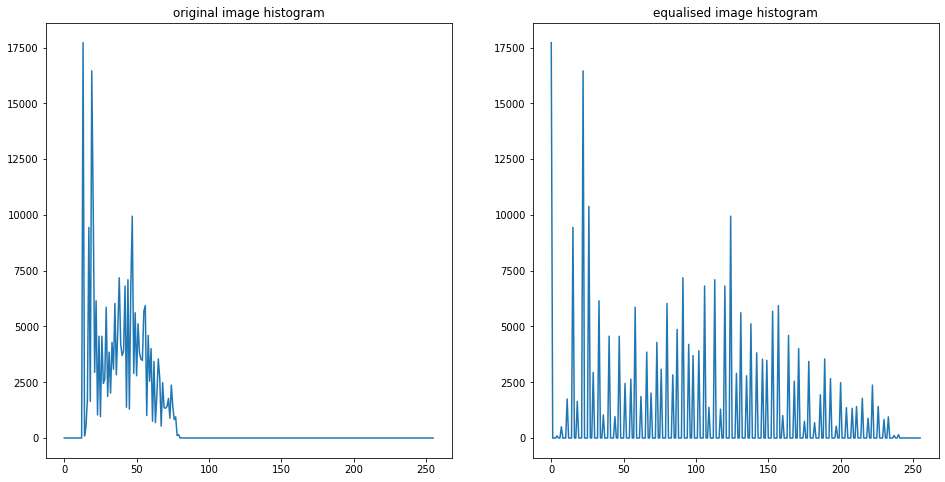

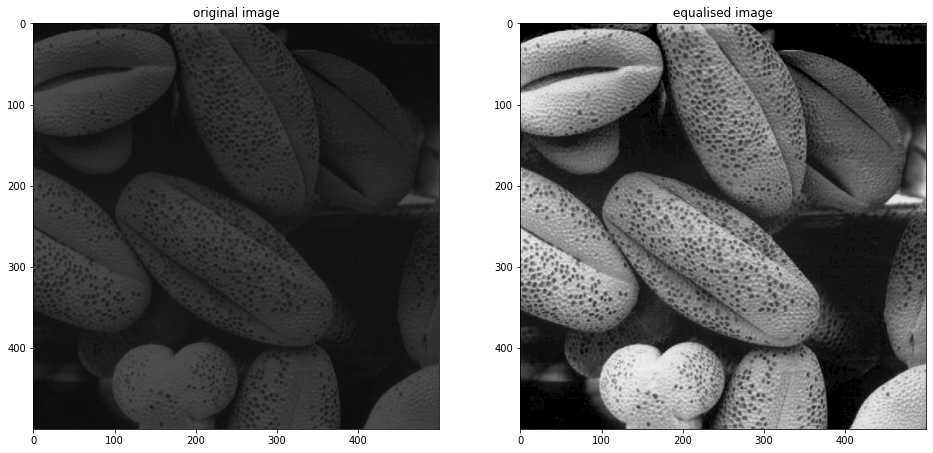

In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

im1 = cv.imread(r'shells.png', cv.IMREAD_GRAYSCALE)
assert im1 is not None
hist_f = cv. calcHist([im1], [0], None, [256], [0,256])
for i in range(256):
    if hist_f[i] != 0:
        l = i
        break
for i in range(255,0,-1):
    if hist_f[i] != 0:
        u = i
        break

hist = np.zeros(256)
eq = np.zeros(256)
for i in range(l, u):
    hist[int(round(255*(i-l)/(u-l)))] = hist_f[i]
    eq[i] = 255*(i-l)/(u-l)
im2 = cv.LUT(im1, eq)
im2 = im2.astype(np.uint8)
fig, ax = plt.subplots(1,2,figsize = (16,8))

ax[0].plot(hist_f)
ax[1].plot(hist)
ax[0].set_title('original image histogram')
ax[1].set_title('equalised image histogram')
fig, ax = plt.subplots(1,2,figsize = (16,8))
ax[0].imshow(cv.cvtColor(im1, cv.COLOR_BGR2RGB))
ax[1].imshow(cv.cvtColor(im2, cv.COLOR_BGR2RGB))
ax[0].set_title('original image')
ax[1].set_title('equalised image')

In [1]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
im1 = cv.imread(r'a1q5images/im01small.png')
assert im1 is not None
def zoom_nn(img, s):
    row = img.shape[0]*s
    col = img.shape[1]*s
    imz = np.zeros((row, col))
    for i in range(row):
        for j in range(col):
            print(img[int(i/s), int(j/s)])
            imz[i, j] = img[int(i/s), int(j/s)]
            
    
    return imz
im1z = zoom_nn(im1, 3)
fig, ax = plt.subplots(1,2,figsize = (16,8))
ax[0].imshow(cv.cvtColor(im1z, cv.COLOR_BGR2RGB))
ax[1].imshow(cv.cvtColor(im1z, cv.COLOR_BGR2RGB))

[ 44  71 108]


# 6)

'for i in range(R):\n    for j in range(C):'

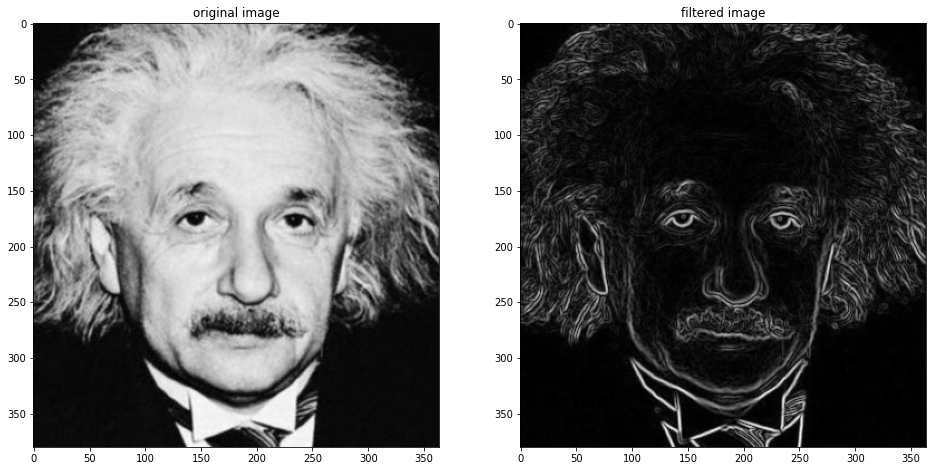

In [13]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

im1 = cv.imread(r'einstein.png', cv.IMREAD_GRAYSCALE).astype(np.float32)
assert im1 is not None

sobel_v = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]], dtype=np.float32)
im_x = cv.filter2D(im1, -1, sobel_v)
sobel_h = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]], dtype=np.float32)
im_y = cv.filter2D(im1, -1, sobel_h)
grad = np.sqrt(im_x**2 + im_y**2)
fig, ax = plt.subplots(1,2,figsize = (16,8))
ax[0].imshow(im1, cmap = 'gray', vmin = 0, vmax = 255)
ax[1].imshow(grad, cmap = 'gray')
ax[0].set_title('original image')
ax[1].set_title('filtered image')
R,C = im1.shape[0], im1.shape[1]
im3 = np.zeros((R, C), dtype = im1.dtype)
'''for i in range(R):
    for j in range(C):'''
            

Text(0.5, 1.0, 'Sobel Filtered Image')

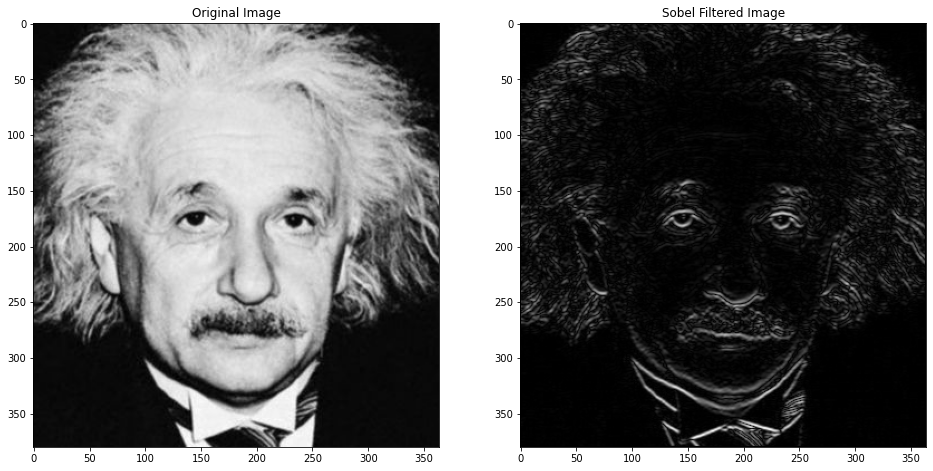

In [15]:
R,C = im1.shape[0], im1.shape[1]
im2 = np.zeros((R, C), np.uint8)
for i in range(1, R-1):
    for j in range(1, C-1):
        im_x = im1[i-1, j-1]*(-1) + im1[i-1, j]*(-2) + im1[i-1, j+1]*(-1) + im1[i+1, j-1]*1 + im1[i+1, j]*2 + im1[i+1, j+1]*1
        im_y = im1[i-1, j-1]*(-1) + im1[i, j-1]*(-2) + im1[i-1, j+1]*1 + im1[i+1, j-1]*(-1) + im1[i, j+1]*2 + im1[i+1, j+1]*1
        grad = np.sqrt(im_x**2 + im_x**2)
        im2[i, j] = (grad / 1020) * 255
        
fig, ax = plt.subplots(1, 2, figsize = (16, 8))
ax[0].imshow(im1, cmap = 'gray', vmin = 0, vmax = 255)
ax[1].imshow(im2, cmap = 'gray')
ax[0].set_title("Original Image")
ax[1].set_title("Filtered Image")

Text(0.5, 1.0, 'Sobel Filtered Image')

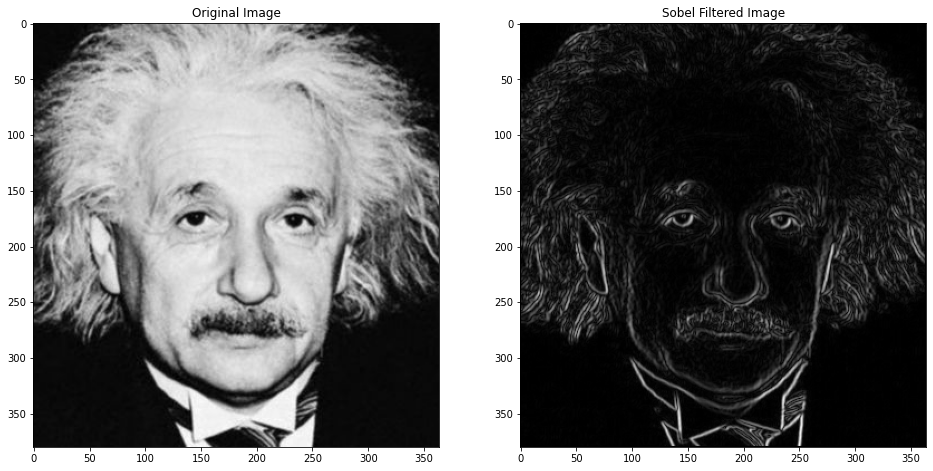

In [21]:
im3 = np.zeros((R, C), np.uint8)
mat = np.multiply((np.array([[1],[2],[1]], dtype=np.int32)),(np.array([1,0,-1], dtype=np.int32)))
sobel_h1 = mat*-1
sobel_v1 = sobel_h1.T
for i in range(1, R-1):
    for j in range(1,C-1):
        window = np.array([[im1[i-1, j-1], im1[i, j], im1[i+1, j+1]], [im1[i, j-1], im1[i, j], im1[i, j+1]], [im1[i+1, j-1], im1[i+1 ,j], im1[i+1, j+1]]], dtype=np.float32)
        sum_h = np.multiply(window, sobel_h1) 
        sum_v = np.multiply(window, sobel_v1) 
        sum_x, sum_y = 0, 0
        for m in range(3):
            for n in range(3):
                sum_x += sum_h[m, n]
                sum_y += sum_v[m, n] 
        grad = np.sqrt(sum_x**2 + sum_y**2)
        im3[i, j] = (grad / 1020) * 255

fig, ax = plt.subplots(1, 2, figsize = (16, 8))
ax[0].imshow(im1, cmap = 'gray', vmin = 0, vmax = 255)
ax[1].imshow(im3, cmap = 'gray')
ax[0].set_title("Original Image")
ax[1].set_title("Filtered Image")



# 7)

Text(0.5, 1.0, 'Back Ground')

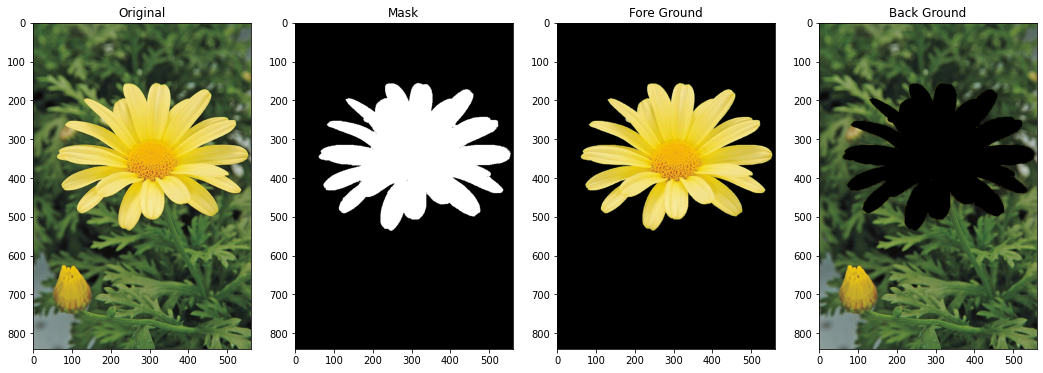

In [26]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

img = cv.imread(r'daisy.jpg')
assert im1 is not None
mask = np.zeros(img.shape[:2], np.uint8)
rect = (0, 100, 561, 500)

fgdModel = np.zeros((1, 65), np.float64)
bgdModel = np.zeros((1, 65), np.float64)
cv.grabCut(img, mask, rect, bgdModel, fgdModel, 5, cv.GC_INIT_WITH_RECT)

mask1 = np.where((mask==0) | (mask==2), 0, 1).astype("uint8")
img_fgd = img*mask1[:, :, np.newaxis]
mask2 = np.where((mask==1) | (mask==3), 0, 1).astype("uint8")
img_bgd = img*mask2[:, :, np.newaxis]
fig, ax = plt.subplots(1, 4, figsize=(18, 6))

ax[0].imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
ax[1].imshow(mask1, cmap = "gray")
ax[2].imshow(cv.cvtColor(img_fgd, cv.COLOR_BGR2RGB))
ax[3].imshow(cv.cvtColor(img_bgd, cv.COLOR_BGR2RGB))
ax[0].set_title("Original")
ax[1].set_title("Mask")
ax[2].set_title("Fore Ground")
ax[3].set_title("Back Ground")


Text(0.5, 1.0, 'Enhanced')

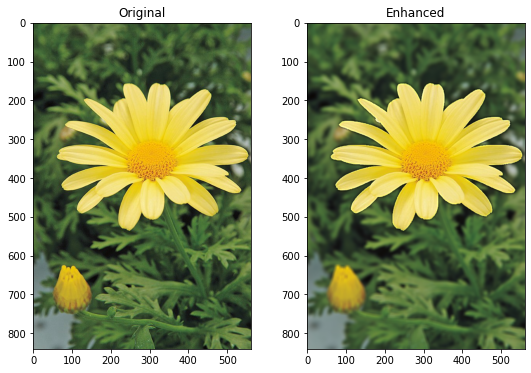

In [27]:
img_blurred = cv.blur(img_bgd, (9, 9), 2)
img_enhanced = cv.add(img_blurred, img_fgd)

fig, ax = plt.subplots(1, 2, figsize=(9, 6))
ax[0].imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
ax[1].imshow(cv.cvtColor(img_enhanced, cv.COLOR_BGR2RGB))
ax[0].set_title("Original")
ax[1].set_title("Enhanced")

in this enhacement for background bluring we are using a kernel of 9x9 and when we are convolving image with kernel the darker pixels becomes more darker. There fore we can see that the background just beyond the edges are quiet dark.